In [124]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [12]:
path = keras.utils.get_file('machine.data','https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data')

16384/8726 [========================================================] - 3s 167us/step


In [13]:
path

'C:\\Users\\Rahu16\\.keras\\datasets\\machine.data'

In [32]:
column_names = ['vendor','model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
dataset = pd.read_csv(path,names=column_names,sep=',')

In [33]:
dataset.head()

,vendor,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [34]:
dataset.shape

(209, 10)

In [35]:
dataset.tail()

,vendor,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47
208,wang,vs-90,480,1000,4000,0,0,0,45,25


In [93]:
x=dataset.groupby(['vendor']).size()
print(x)
len(x)

vendor
adviser          1
amdahl           9
apollo           2
basf             2
bti              2
burroughs        8
c.r.d            6
cambex           5
cdc              9
dec              6
dg               7
formation        5
four-phase       1
gould            3
harris           7
honeywell       13
hp               7
ibm             32
ipl              6
magnuson         6
microdata        1
nas             19
ncr             13
nixdorf          3
perkin-elmer     3
prime            5
siemens         12
sperry          13
sratus           1
wang             2
dtype: int64


30

In [94]:
dataset.isna().sum()

vendor    0
model     0
MYCT      0
MMIN      0
MMAX      0
CACH      0
CHMIN     0
CHMAX     0
PRP       0
ERP       0
dtype: int64

In [95]:
data_vendor = pd.get_dummies(dataset['vendor'])
numeric_data = pd.concat([data_vendor,dataset], axis=1)
numeric_data.head()

,adviser,amdahl,apollo,basf,bti,burroughs,c.r.d,cambex,cdc,dec,...,vendor,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,1,0,0,0,0,0,0,0,0,0,...,adviser,32/60,125,256,6000,256,16,128,198,199
1,0,1,0,0,0,0,0,0,0,0,...,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,0,1,0,0,0,0,0,0,0,0,...,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,0,1,0,0,0,0,0,0,0,0,...,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,0,1,0,0,0,0,0,0,0,0,...,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [96]:
numeric_data.pop('vendor')
numeric_data.head()

,adviser,amdahl,apollo,basf,bti,burroughs,c.r.d,cambex,cdc,dec,...,wang,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,1,0,0,0,0,0,0,0,0,0,...,0,32/60,125,256,6000,256,16,128,198,199
1,0,1,0,0,0,0,0,0,0,0,...,0,470v/7,29,8000,32000,32,8,32,269,253
2,0,1,0,0,0,0,0,0,0,0,...,0,470v/7a,29,8000,32000,32,8,32,220,253
3,0,1,0,0,0,0,0,0,0,0,...,0,470v/7b,29,8000,32000,32,8,32,172,253
4,0,1,0,0,0,0,0,0,0,0,...,0,470v/7c,29,8000,16000,32,8,16,132,132


In [97]:
x = numeric_data.groupby(['model']).size()
print(x)
len(x)

model
100           1
1100/61-h1    1
1100/81       1
1100/82       1
1100/83       1
             ..
vax:11/730    1
vax:11/750    1
vax:11/780    1
vs-100        1
vs-90         1
Length: 209, dtype: int64


209

In [98]:
numeric_data.pop('model')

0              32/60
1             470v/7
2            470v/7a
3            470v/7b
4            470v/7c
           ...      
204             80/8
205    90/80-model-3
206               32
207           vs-100
208            vs-90
Name: model, Length: 209, dtype: object

In [99]:
numeric_data.head()

,adviser,amdahl,apollo,basf,bti,burroughs,c.r.d,cambex,cdc,dec,...,sratus,wang,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,1,0,0,0,0,0,0,0,0,0,...,0,0,125,256,6000,256,16,128,198,199
1,0,1,0,0,0,0,0,0,0,0,...,0,0,29,8000,32000,32,8,32,269,253
2,0,1,0,0,0,0,0,0,0,0,...,0,0,29,8000,32000,32,8,32,220,253
3,0,1,0,0,0,0,0,0,0,0,...,0,0,29,8000,32000,32,8,32,172,253
4,0,1,0,0,0,0,0,0,0,0,...,0,0,29,8000,16000,32,8,16,132,132


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

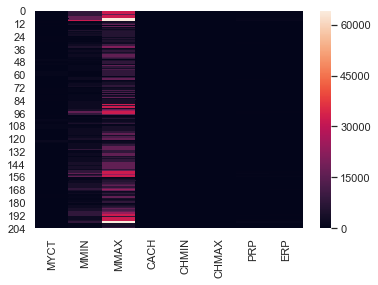

In [101]:
d=numeric_data.iloc[:,30:]
sns.violinplot(d)
sns.heatmap(d)
plt.show()

In [102]:
out=numeric_data['ERP']
numeric_data.pop('ERP')

0      199
1      253
2      253
3      253
4      132
      ... 
204     37
205     50
206     41
207     47
208     25
Name: ERP, Length: 209, dtype: int64

In [103]:
print(out)

0      199
1      253
2      253
3      253
4      132
      ... 
204     37
205     50
206     41
207     47
208     25
Name: ERP, Length: 209, dtype: int64


In [106]:
n=numeric_data.describe()
n

,adviser,amdahl,apollo,basf,bti,burroughs,c.r.d,cambex,cdc,dec,...,sperry,sratus,wang,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,...,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,0.004785,0.043062,0.009569,0.009569,0.009569,0.038278,0.028708,0.023923,0.043062,0.028708,...,0.062201,0.004785,0.009569,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010
std,0.069171,0.203485,0.097588,0.097588,0.097588,0.192326,0.167386,0.153178,0.203485,0.167386,...,0.242100,0.069171,0.097588,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000


In [107]:
m=n.transpose()
m

,count,mean,std,min,25%,50%,75%,max
adviser,209.0,0.004785,0.069171,0.0,0.0,0.0,0.0,1.0
amdahl,209.0,0.043062,0.203485,0.0,0.0,0.0,0.0,1.0
apollo,209.0,0.009569,0.097588,0.0,0.0,0.0,0.0,1.0
basf,209.0,0.009569,0.097588,0.0,0.0,0.0,0.0,1.0
bti,209.0,0.009569,0.097588,0.0,0.0,0.0,0.0,1.0
burroughs,209.0,0.038278,0.192326,0.0,0.0,0.0,0.0,1.0
c.r.d,209.0,0.028708,0.167386,0.0,0.0,0.0,0.0,1.0
cambex,209.0,0.023923,0.153178,0.0,0.0,0.0,0.0,1.0
cdc,209.0,0.043062,0.203485,0.0,0.0,0.0,0.0,1.0
dec,209.0,0.028708,0.167386,0.0,0.0,0.0,0.0,1.0


In [108]:
norm_data = (numeric_data - m['mean'])/m['std']   #vectorize implementation
norm_data

,adviser,amdahl,apollo,basf,bti,burroughs,c.r.d,cambex,cdc,dec,...,sperry,sratus,wang,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,14.387661,-0.211624,-0.098059,-0.098059,-0.098059,-0.199024,-0.171509,-0.156181,-0.211624,-0.171509,...,-0.256923,-0.069171,-0.098059,-0.302859,-0.673409,-0.494275,5.680569,1.658008,4.220899,0.574380
1,-0.069171,4.702754,-0.098059,-0.098059,-0.098059,-0.199024,-0.171509,-0.156181,-0.211624,-0.171509,...,-0.256923,-0.069171,-0.098059,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,1.015838
2,-0.069171,4.702754,-0.098059,-0.098059,-0.098059,-0.199024,-0.171509,-0.156181,-0.211624,-0.171509,...,-0.256923,-0.069171,-0.098059,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,0.711170
3,-0.069171,4.702754,-0.098059,-0.098059,-0.098059,-0.199024,-0.171509,-0.156181,-0.211624,-0.171509,...,-0.256923,-0.069171,-0.098059,-0.671717,1.323114,1.722913,0.167228,0.484346,0.528211,0.412720
4,-0.069171,4.702754,-0.098059,-0.098059,-0.098059,-0.199024,-0.171509,-0.156181,-0.211624,-0.171509,...,-0.256923,-0.069171,-0.098059,-0.671717,1.323114,0.358489,0.167228,0.484346,-0.087238,0.164011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,-0.069171,-0.211624,-0.098059,-0.098059,-0.098059,-0.199024,-0.171509,-0.156181,-0.211624,-0.171509,...,3.873601,-0.069171,-0.098059,-0.306701,-0.481594,-0.323723,-0.620392,-0.542608,-0.394962,-0.395584
205,-0.069171,-0.211624,-0.098059,-0.098059,-0.098059,-0.199024,-0.171509,-0.156181,-0.211624,-0.171509,...,3.873601,-0.069171,-0.098059,-0.406600,-0.481594,-0.323723,0.167228,-0.395900,-0.394962,-0.370713
206,-0.069171,-0.211624,-0.098059,-0.098059,-0.098059,-0.199024,-0.171509,-0.156181,-0.211624,-0.171509,...,-0.256923,14.387661,-0.098059,-0.302859,-0.223779,-0.323723,-0.620392,-0.395900,-0.164169,-0.333406
207,-0.069171,-0.211624,-0.098059,-0.098059,-0.098059,-0.199024,-0.171509,-0.156181,-0.211624,-0.171509,...,-0.256923,-0.069171,10.149127,1.061146,-0.607408,-0.323723,0.167228,-0.689316,-0.702686,-0.240141


In [111]:
from sklearn.model_selection import train_test_split

In [113]:
x_train,x_test,y_train,y_test = train_test_split(norm_data,out,test_size=0.2,shuffle=True)

In [116]:
type(x_train)

pandas.core.frame.DataFrame

In [122]:
input_shape=len(x_train.keys())
input_shape

37

In [146]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [147]:
from datetime import datetime

In [149]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [150]:
model=keras.models.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

In [151]:
model.compile(optimizer=keras.optimizers.Adam(0.01),loss='mse',metrics=['mae','mse'])

In [169]:
tf.keras.backend.set_floatx('float64')
history=model.fit(x_train,y_train,batch_size=32,epochs=2000,callbacks=[tensorboard_callback])

Epoch 1/2000
6/6 [==============================] - 1s 176ms/step - loss: 0.3910 - mae: 0.3702 - mse: 0.3910
Epoch 2/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.4643 - mae: 0.4022 - mse: 0.4643
Epoch 3/2000
6/6 [==============================] - 0s 17ms/step - loss: 0.7667 - mae: 0.4590 - mse: 0.7667
Epoch 4/2000
6/6 [==============================] - 0s 10ms/step - loss: 0.6111 - mae: 0.4755 - mse: 0.6111
Epoch 5/2000
6/6 [==============================] - 0s 14ms/step - loss: 0.4309 - mae: 0.3925 - mse: 0.4309
Epoch 6/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.4056 - mae: 0.3769 - mse: 0.4056
Epoch 7/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.4064 - mae: 0.3693 - mse: 0.4064
Epoch 8/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.6708 - mae: 0.4608 - mse: 0.6708
Epoch 9/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.6868 - mae: 0.4757 - mse: 0.6868
Epoch 10/2000
6/6 [=============

6/6 [==============================] - 0s 6ms/step - loss: 96.1159 - mae: 5.1608 - mse: 96.1159
Epoch 147/2000
6/6 [==============================] - 0s 6ms/step - loss: 59.1686 - mae: 4.1995 - mse: 59.1686
Epoch 148/2000
6/6 [==============================] - 0s 6ms/step - loss: 87.9017 - mae: 5.3126 - mse: 87.9017
Epoch 149/2000
6/6 [==============================] - 0s 6ms/step - loss: 37.5767 - mae: 3.7322 - mse: 37.5767
Epoch 150/2000
6/6 [==============================] - 0s 6ms/step - loss: 11.3131 - mae: 2.1657 - mse: 11.3131
Epoch 151/2000
6/6 [==============================] - 0s 6ms/step - loss: 17.2148 - mae: 2.6029 - mse: 17.2148
Epoch 152/2000
6/6 [==============================] - ETA: 0s - loss: 2.7957 - mae: 1.2271 - mse: 2.795 - 0s 6ms/step - loss: 18.9084 - mae: 2.5822 - mse: 18.9084
Epoch 153/2000
6/6 [==============================] - 0s 6ms/step - loss: 18.8452 - mae: 2.2870 - mse: 18.8452
Epoch 154/2000
6/6 [==============================] - 0s 7ms/step - loss: 6

6/6 [==============================] - 0s 6ms/step - loss: 1.1040 - mae: 0.6355 - mse: 1.1040
Epoch 296/2000
6/6 [==============================] - 0s 7ms/step - loss: 1.3392 - mae: 0.6608 - mse: 1.3392
Epoch 297/2000
6/6 [==============================] - 0s 21ms/step - loss: 1.4595 - mae: 0.7496 - mse: 1.4595
Epoch 298/2000
6/6 [==============================] - 0s 9ms/step - loss: 1.1154 - mae: 0.6745 - mse: 1.1154
Epoch 299/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.8519 - mae: 0.5889 - mse: 0.8519
Epoch 300/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.1109 - mae: 0.6204 - mse: 1.1109
Epoch 301/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.6347 - mae: 0.7527 - mse: 1.6347
Epoch 302/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.4327 - mae: 0.7365 - mse: 1.4327
Epoch 303/2000
6/6 [==============================] - 0s 7ms/step - loss: 1.5835 - mae: 0.7484 - mse: 1.5835
Epoch 304/2000
6/6 [=============

6/6 [==============================] - 0s 8ms/step - loss: 12.8752 - mae: 1.8823 - mse: 12.8752
Epoch 445/2000
6/6 [==============================] - 0s 6ms/step - loss: 13.5022 - mae: 2.1636 - mse: 13.5022
Epoch 446/2000
6/6 [==============================] - 0s 21ms/step - loss: 63.2266 - mae: 3.3492 - mse: 63.2266
Epoch 447/2000
6/6 [==============================] - 0s 9ms/step - loss: 94.3627 - mae: 4.5106 - mse: 94.3627
Epoch 448/2000
6/6 [==============================] - 0s 6ms/step - loss: 102.7460 - mae: 5.0189 - mse: 102.7460
Epoch 449/2000
6/6 [==============================] - 0s 6ms/step - loss: 33.5287 - mae: 3.3215 - mse: 33.5287
Epoch 450/2000
6/6 [==============================] - 0s 23ms/step - loss: 34.4567 - mae: 2.5074 - mse: 34.4567
Epoch 451/2000
6/6 [==============================] - 0s 9ms/step - loss: 55.0745 - mae: 3.1973 - mse: 55.0745
Epoch 452/2000
6/6 [==============================] - 0s 6ms/step - loss: 19.6048 - mae: 2.2786 - mse: 19.6048
Epoch 453/20

6/6 [==============================] - 0s 6ms/step - loss: 1.9613 - mae: 0.7329 - mse: 1.9613
Epoch 519/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.2479 - mae: 0.7850 - mse: 2.2479
Epoch 520/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.2487 - mae: 0.7456 - mse: 2.2487
Epoch 521/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.9444 - mae: 0.7411 - mse: 1.9444
Epoch 522/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.9294 - mae: 0.7288 - mse: 1.9294
Epoch 523/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.9102 - mae: 0.7133 - mse: 1.9102
Epoch 524/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.8223 - mae: 0.6850 - mse: 1.8223
Epoch 525/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.8478 - mae: 0.6786 - mse: 1.8478
Epoch 526/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.9202 - mae: 0.6812 - mse: 1.9202
Epoch 527/2000
6/6 [==============

6/6 [==============================] - 0s 6ms/step - loss: 1.2071 - mae: 0.5836 - mse: 1.2071
Epoch 668/2000
6/6 [==============================] - 0s 7ms/step - loss: 1.1773 - mae: 0.5428 - mse: 1.1773
Epoch 669/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.2995 - mae: 0.5628 - mse: 1.2995
Epoch 670/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.2017 - mae: 0.5617 - mse: 1.2017
Epoch 671/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.1820 - mae: 0.6102 - mse: 1.1820
Epoch 672/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.2414 - mae: 0.6149 - mse: 1.2414
Epoch 673/2000
6/6 [==============================] - 0s 7ms/step - loss: 1.4943 - mae: 0.6965 - mse: 1.4943
Epoch 674/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.1123 - mae: 0.7063 - mse: 2.1123
Epoch 675/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.2897 - mae: 0.6786 - mse: 1.2897
Epoch 676/2000
6/6 [==============

6/6 [==============================] - 0s 10ms/step - loss: 3.7853 - mae: 1.0229 - mse: 3.7853
Epoch 816/2000
6/6 [==============================] - 0s 7ms/step - loss: 5.9476 - mae: 1.2020 - mse: 5.9476
Epoch 817/2000
6/6 [==============================] - 0s 21ms/step - loss: 16.5322 - mae: 1.8442 - mse: 16.5322
Epoch 818/2000
6/6 [==============================] - 0s 13ms/step - loss: 35.6471 - mae: 2.7517 - mse: 35.6471
Epoch 819/2000
6/6 [==============================] - 0s 6ms/step - loss: 30.3766 - mae: 2.1820 - mse: 30.3766
Epoch 820/2000
6/6 [==============================] - 0s 23ms/step - loss: 38.7842 - mae: 2.8182 - mse: 38.7842
Epoch 821/2000
6/6 [==============================] - 0s 10ms/step - loss: 49.9790 - mae: 3.4514 - mse: 49.9790
Epoch 822/2000
6/6 [==============================] - 0s 25ms/step - loss: 31.7032 - mae: 3.0539 - mse: 31.7032
Epoch 823/2000
6/6 [==============================] - 0s 8ms/step - loss: 78.7191 - mae: 3.3065 - mse: 78.7191
Epoch 824/2000

6/6 [==============================] - 0s 6ms/step - loss: 0.1944 - mae: 0.2851 - mse: 0.1944
Epoch 964/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.2206 - mae: 0.3089 - mse: 0.2206
Epoch 965/2000
6/6 [==============================] - 0s 23ms/step - loss: 0.2307 - mae: 0.3056 - mse: 0.2307
Epoch 966/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.2331 - mae: 0.3017 - mse: 0.2331
Epoch 967/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.2479 - mae: 0.3196 - mse: 0.2479
Epoch 968/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.2461 - mae: 0.3262 - mse: 0.2461
Epoch 969/2000
6/6 [==============================] - 0s 21ms/step - loss: 0.2059 - mae: 0.2944 - mse: 0.2059
Epoch 970/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.2551 - mae: 0.3166 - mse: 0.2551
Epoch 971/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.2926 - mae: 0.3292 - mse: 0.2926
Epoch 972/2000
6/6 [============

6/6 [==============================] - 0s 7ms/step - loss: 0.5499 - mae: 0.4943 - mse: 0.5499
Epoch 1112/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.5322 - mae: 0.5125 - mse: 0.5322
Epoch 1113/2000
6/6 [==============================] - 0s 7ms/step - loss: 0.6049 - mae: 0.5195 - mse: 0.6049
Epoch 1114/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.5466 - mae: 0.5067 - mse: 0.5466
Epoch 1115/2000
6/6 [==============================] - 0s 6ms/step - loss: 1.2459 - mae: 0.6056 - mse: 1.2459
Epoch 1116/2000
6/6 [==============================] - 0s 8ms/step - loss: 1.7985 - mae: 0.7632 - mse: 1.7985
Epoch 1117/2000
6/6 [==============================] - 0s 7ms/step - loss: 2.9133 - mae: 0.9664 - mse: 2.9133
Epoch 1118/2000
6/6 [==============================] - 0s 8ms/step - loss: 5.7814 - mae: 1.3894 - mse: 5.7814
Epoch 1119/2000
6/6 [==============================] - 0s 22ms/step - loss: 15.5182 - mae: 2.0113 - mse: 15.5182
Epoch 1120/2000
6/6 [==

6/6 [==============================] - 0s 21ms/step - loss: 2.5185 - mae: 1.0282 - mse: 2.5185
Epoch 1259/2000
6/6 [==============================] - 0s 8ms/step - loss: 6.4854 - mae: 1.2827 - mse: 6.4854
Epoch 1260/2000
6/6 [==============================] - 0s 6ms/step - loss: 3.4776 - mae: 1.1180 - mse: 3.4776
Epoch 1261/2000
6/6 [==============================] - 0s 21ms/step - loss: 7.5581 - mae: 1.3396 - mse: 7.5581
Epoch 1262/2000
6/6 [==============================] - 0s 7ms/step - loss: 10.5956 - mae: 1.6374 - mse: 10.5956
Epoch 1263/2000
6/6 [==============================] - 0s 8ms/step - loss: 9.4591 - mae: 1.7338 - mse: 9.4591
Epoch 1264/2000
6/6 [==============================] - 0s 7ms/step - loss: 42.6844 - mae: 2.6464 - mse: 42.6844
Epoch 1265/2000
6/6 [==============================] - 0s 21ms/step - loss: 23.2035 - mae: 2.1921 - mse: 23.2035
Epoch 1266/2000
6/6 [==============================] - 0s 11ms/step - loss: 46.5999 - mae: 2.8654 - mse: 46.5999
Epoch 1267/200

6/6 [==============================] - 0s 7ms/step - loss: 0.8327 - mae: 0.5125 - mse: 0.8327
Epoch 1407/2000
6/6 [==============================] - 0s 7ms/step - loss: 1.4815 - mae: 0.6648 - mse: 1.4815
Epoch 1408/2000
6/6 [==============================] - 0s 7ms/step - loss: 0.9734 - mae: 0.6345 - mse: 0.9734
Epoch 1409/2000
6/6 [==============================] - 0s 8ms/step - loss: 2.2608 - mae: 0.7353 - mse: 2.2608
Epoch 1410/2000
6/6 [==============================] - 0s 8ms/step - loss: 2.1150 - mae: 0.6747 - mse: 2.1150
Epoch 1411/2000
6/6 [==============================] - 0s 16ms/step - loss: 1.8807 - mae: 0.7010 - mse: 1.8807
Epoch 1412/2000
6/6 [==============================] - 0s 13ms/step - loss: 2.5245 - mae: 0.8924 - mse: 2.5245
Epoch 1413/2000
6/6 [==============================] - 0s 8ms/step - loss: 1.6782 - mae: 0.6978 - mse: 1.6782
Epoch 1414/2000
6/6 [==============================] - 0s 6ms/step - loss: 2.4801 - mae: 0.7539 - mse: 2.4801
Epoch 1415/2000
6/6 [===

6/6 [==============================] - 0s 8ms/step - loss: 0.4078 - mae: 0.3924 - mse: 0.4078
Epoch 1481/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.5342 - mae: 0.4200 - mse: 0.5342
Epoch 1482/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.3724 - mae: 0.3690 - mse: 0.3724
Epoch 1483/2000
6/6 [==============================] - 0s 7ms/step - loss: 0.5506 - mae: 0.4163 - mse: 0.5506
Epoch 1484/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.3033 - mae: 0.3580 - mse: 0.3033
Epoch 1485/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.3338 - mae: 0.3725 - mse: 0.3338
Epoch 1486/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.2861 - mae: 0.3450 - mse: 0.2861
Epoch 1487/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.3396 - mae: 0.3581 - mse: 0.3396
Epoch 1488/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.2903 - mae: 0.3177 - mse: 0.2903
Epoch 1489/2000
6/6 [=====

6/6 [==============================] - 0s 21ms/step - loss: 3.2748 - mae: 0.8277 - mse: 3.2748
Epoch 1629/2000
6/6 [==============================] - 0s 10ms/step - loss: 2.8084 - mae: 0.9596 - mse: 2.8084
Epoch 1630/2000
6/6 [==============================] - 0s 8ms/step - loss: 4.0580 - mae: 0.9861 - mse: 4.0580
Epoch 1631/2000
6/6 [==============================] - 0s 21ms/step - loss: 16.2797 - mae: 2.0100 - mse: 16.2797
Epoch 1632/2000
6/6 [==============================] - 0s 8ms/step - loss: 21.5428 - mae: 2.3930 - mse: 21.5428
Epoch 1633/2000
6/6 [==============================] - 0s 8ms/step - loss: 24.9070 - mae: 2.5766 - mse: 24.9070
Epoch 1634/2000
6/6 [==============================] - 0s 25ms/step - loss: 28.9141 - mae: 2.5252 - mse: 28.9141
Epoch 1635/2000
6/6 [==============================] - 0s 11ms/step - loss: 84.4100 - mae: 4.4127 - mse: 84.4100
Epoch 1636/2000
6/6 [==============================] - 0s 21ms/step - loss: 184.0745 - mae: 6.6139 - mse: 184.0745
Epoch 

6/6 [==============================] - 0s 7ms/step - loss: 0.6763 - mae: 0.5043 - mse: 0.6763
Epoch 1776/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.4062 - mae: 0.3781 - mse: 0.4062
Epoch 1777/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.2314 - mae: 0.3312 - mse: 0.2314
Epoch 1778/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.2792 - mae: 0.3485 - mse: 0.2792
Epoch 1779/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.2947 - mae: 0.3584 - mse: 0.2947
Epoch 1780/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.7202 - mae: 0.4364 - mse: 0.7202
Epoch 1781/2000
6/6 [==============================] - 0s 7ms/step - loss: 0.5091 - mae: 0.4392 - mse: 0.5091
Epoch 1782/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.3706 - mae: 0.3736 - mse: 0.3706
Epoch 1783/2000
6/6 [==============================] - 0s 9ms/step - loss: 0.2413 - mae: 0.3211 - mse: 0.2413
Epoch 1784/2000
6/6 [=====

6/6 [==============================] - 0s 7ms/step - loss: 0.2824 - mae: 0.3525 - mse: 0.2824
Epoch 1923/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.2943 - mae: 0.3579 - mse: 0.2943
Epoch 1924/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.2543 - mae: 0.3353 - mse: 0.2543
Epoch 1925/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.2692 - mae: 0.3340 - mse: 0.2692
Epoch 1926/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.2755 - mae: 0.3463 - mse: 0.2755
Epoch 1927/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.2859 - mae: 0.3499 - mse: 0.2859
Epoch 1928/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.2910 - mae: 0.3456 - mse: 0.2910
Epoch 1929/2000
6/6 [==============================] - 0s 6ms/step - loss: 0.2487 - mae: 0.3295 - mse: 0.2487
Epoch 1930/2000
6/6 [==============================] - 0s 8ms/step - loss: 0.2585 - mae: 0.3322 - mse: 0.2585
Epoch 1931/2000
6/6 [=====

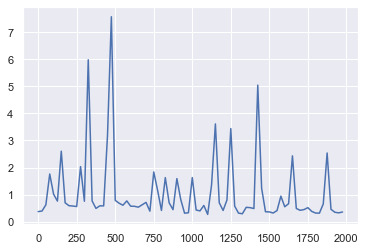

In [172]:
import matplotlib.pyplot as plt
hist=pd.DataFrame(history.history)
hist.head()
a=[]
b=[]
hist['mae'][1]
for i in range(len(hist)):
    if i % 25 == 0:
        a.append(hist['mae'][i])
        b.append(i)

        
plt.plot(b,a)

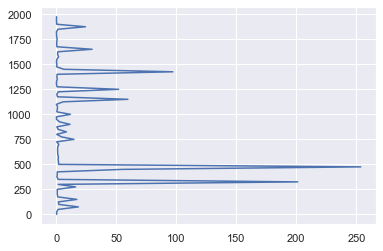

In [171]:
a=[]
b=[]
for i in range(len(hist)):
    if i % 25 == 0:
        a.append(hist['mse'][i])
        b.append(i)

        
plt.plot(a,b)


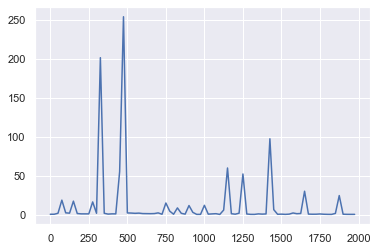

In [173]:

a=[]
b=[]
for i in range(len(hist)):
    if i % 25 == 0:
        a.append(hist['loss'][i])
        b.append(i)

        
plt.plot(b,a)

In [154]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 352.1352 - mae: 7.8413 - mse: 352.1353


[352.1352419172014, 7.841335202894659, 352.1352576245291]